<a href="https://colab.research.google.com/github/keunjoopark/NYC-taxi-trip-duration/blob/master/EDA_FE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Set environment

In [ ]:
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/dt"

test.csv  train.csv


## I. Data


### a. Load the dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import missingno as msno

%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 10]

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
train_df = pd.read_csv('/content/drive/My Drive/dt/train.csv')
test_df = pd.read_csv('/content/drive/My Drive/dt/test.csv')

### b. Data Summary

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  625134 non-null  object 
 1   vendor_id           625134 non-null  int64  
 2   pickup_datetime     625134 non-null  object 
 3   passenger_count     625134 non-null  int64  
 4   pickup_longitude    625134 non-null  float64
 5   pickup_latitude     625134 non-null  float64
 6   dropoff_longitude   625134 non-null  float64
 7   dropoff_latitude    625134 non-null  float64
 8   store_and_fwd_flag  625134 non-null  object 
dtypes: float64(4), int64(2), object(3)
memory usage: 42.9+ MB


In [ ]:
train_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [ ]:
train_df.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
# Check for duplicates
print(train_df.duplicated().sum())
print(train_df.id.duplicated().sum())
print(test_df.id.duplicated().sum())

0
0
0


In [ ]:
# Check for null data
print (train_df.isnull().sum())
print(test_df.isnull().sum())

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64
id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
dtype: int64


In [ ]:
# ensure all trips are valid
sum(train_df.dropoff_datetime < train_df.pickup_datetime)

0

In [ ]:
def fraction_unique(x):
    return len(train_df[x].unique())

uvalues = {x: fraction_unique(x) for x in train_df.columns}
uvalues

{'dropoff_datetime': 1380377,
 'dropoff_latitude': 62519,
 'dropoff_longitude': 33821,
 'id': 1458644,
 'passenger_count': 10,
 'pickup_datetime': 1380222,
 'pickup_latitude': 45245,
 'pickup_longitude': 23047,
 'store_and_fwd_flag': 2,
 'trip_duration': 7417,
 'vendor_id': 2}

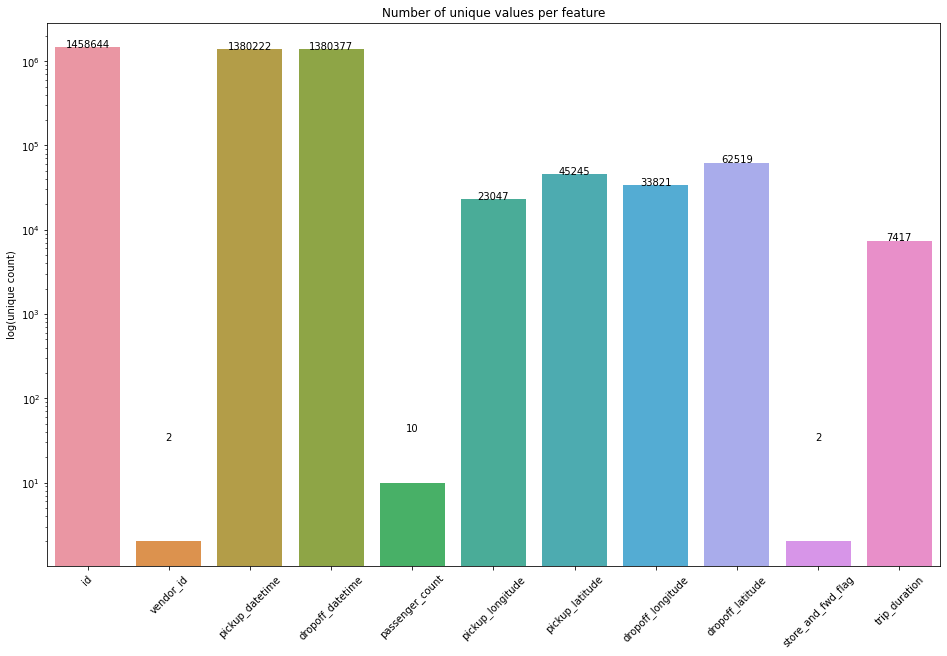

In [ ]:
cols = ['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
        'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
        'store_and_fwd_flag', 'trip_duration']

uniques = [len(train_df[col].unique()) for col in cols]
ax = sns.barplot(cols, uniques, log=True)
ax.set_xticklabels(cols,rotation=45)
ax.set(ylabel='log(unique count)', title='Number of unique values per feature')
for p, uniq in zip(ax.patches, uniques):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
        height + 30,
        uniq,
        ha="center")

In [ ]:
sns.pairplot(data = train_df)

Error in callback <function flush_figures at 0x7f2106f87840> (for post_execute):


KeyboardInterrupt: ignored

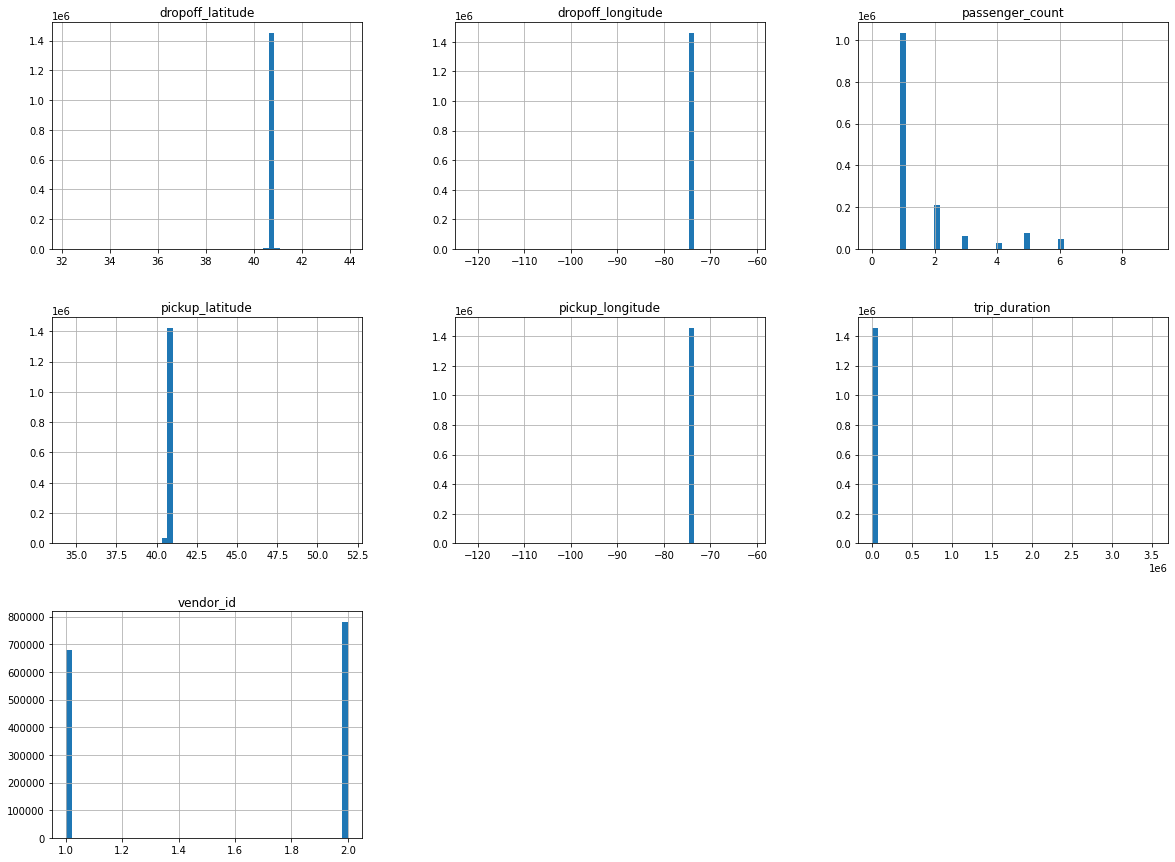

In [ ]:
train_df.hist(bins=50, figsize=(20,15))
plt.show()

## II. EDA & FE

###a. Target feature

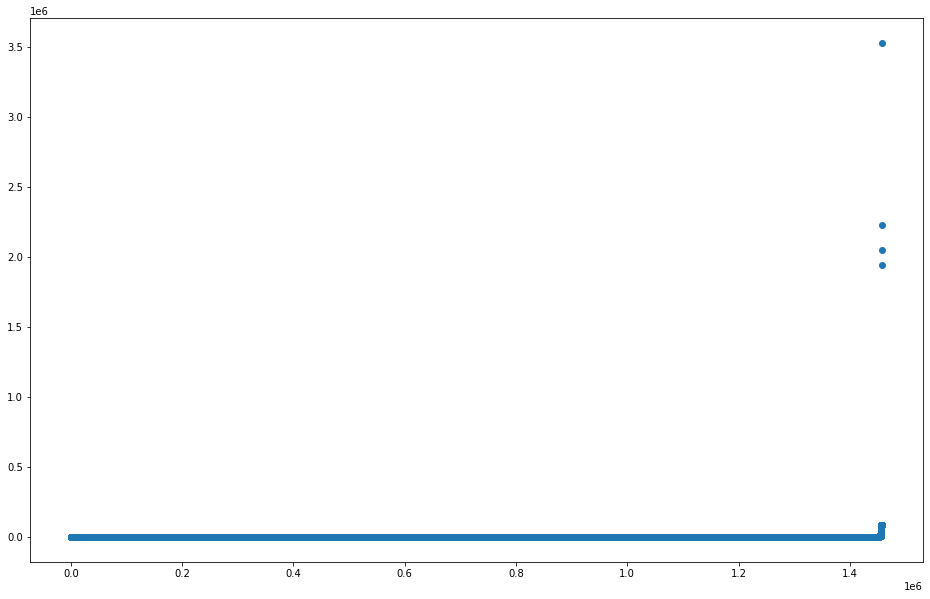

In [ ]:
# Check target
plt.scatter(range(train_df.shape[0]),np.sort(train_df['trip_duration']))

In [ ]:
plt.figure(figsize=(15, 5))
plt.suptitle("Distribution of Trip Duration", fontsize=13)

plt.subplot(121)
sns.distplot(train_df["trip_duration"], color="r",bins=10)
plt.axvline(train_df["trip_duration"].median(), linestyle='dashed', color="k")
plt.xticks(rotation=30, ha='right')

plt.subplot(122)
sns.boxplot(train_df["trip_duration"])
plt.axvline(train_df["trip_duration"].median(), linestyle='dashed', color="r")
plt.xticks(rotation=30, ha='right')

plt.show()

In [ ]:
train_df[train_df["trip_duration"] > 1500000]

In [ ]:
train_df = train_df[train_df["trip_duration"] < 1500000]

In [ ]:
#train_df[train_df.trip_duration < train_df.trip_duration.quantile(0.99)] 

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_date,pickup_day,pickup_month,pickup_weekday,pickup_is_weekend,pickup_holiday,pickup_near_holiday,pickup_businessday,pickup_dayofweek,pickup_time_delta,week_delta,pickup_weekofyear,pickup_hour,pickup_is_night,pickup_is_latenight,pickup_minute,pickup_dayofyear,week_delta_sin,pickup_hour_sin,pickup_minuteoftheday,pickup_dt,pickup_week_hour,distance_haversine,distance_manhattan,direction,center_latitude,center_longitude,avg_speed_h,avg_speed_m,pickup_cluster,dropoff_cluster,pickup_datetime_group,dropoff_cluster_count,avg_speed_cluster_h,avg_speed_cluster_m,avg_cluster_duration,avg_speed_h_gby_pickup_cluster,avg_speed_m_gby_pickup_cluster,trip_duration_gby_pickup_cluster,avg_speed_h_pickup_cluster_dropoff_cluster,cnt_pickup_cluster_dropoff_cluster
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016-03-14,14,3,0,0,0,0,1,0,6369878.0,0.725000,11,17,0,1,24,74,0.102188,0.629410,1044,6369878.0,17,1.498521,1.735433,99.970196,40.766769,-73.973392,11.856428,13.730901,92,49,2016-03-14 17:00:00,0.0,10.177363,11.711280,633.770492,13.487639,17.193999,875.918033,10.177363,610
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016-06-12,12,6,6,1,0,0,0,6,14085798.0,6.029861,23,0,1,1,43,164,0.177891,0.000000,43,14085798.0,144,1.805507,2.430506,-117.153768,40.734858,-73.989948,9.803659,13.197318,40,95,2016-06-12 01:00:00,0.0,10.443798,13.870600,791.065156,14.017645,18.075626,797.672896,10.443798,353
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016-01-19,19,1,1,0,0,1,1,1,1596907.0,1.482639,3,11,0,1,35,19,0.381157,0.982963,695,1596907.0,35,6.385098,8.203575,-159.680165,40.737013,-73.992180,10.822201,13.904365,71,68,2016-01-19 12:00:00,0.0,17.435450,22.866437,1600.396675,12.243560,15.703138,956.573931,17.435450,421
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016-04-06,6,4,2,0,0,0,1,2,8364734.0,2.813889,14,19,1,1,32,97,0.908141,0.370590,1172,8364734.0,67,1.485498,1.661331,-172.737700,40.713345,-74.011154,12.465721,13.941241,23,68,2016-04-06 20:00:00,0.0,11.115323,13.458813,623.929541,14.396493,18.414095,982.605733,11.115323,1547
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016-03-26,26,3,5,1,0,0,0,5,7392638.0,5.562500,12,13,0,1,30,86,0.361582,0.982963,810,7392638.0,133,1.188588,1.199457,179.473585,40.787865,-73.972988,9.836594,9.926539,14,56,2016-03-26 14:00:00,0.0,14.119693,17.879843,277.744989,15.453786,20.001406,801.981535,14.119693,898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,2016-04-08,8,4,4,0,0,0,1,4,8515847.0,4.563194,14,13,0,1,31,99,0.789081,0.982963,811,8515847.0,109,1.225080,1.665895,-119.059338,40.742846,-73.988556,5.668751,7.708511,96,99,2016-04-08 14:00:00,0.0,13.020642,17.334543,434.524525,13.200060,17.115359,908.332674,13.020642,999
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,2016-01-10,10,1,6,1,0,0,0,6,804898.0,6.315972,1,7,0,1,35,10,0.091320,0.629410,455,804898.0,151,6.049836,8.058580,25.342196,40.771963,-73.985565,33.251005,44.291433,91,82,2016-01-10 08:00:00,0.0,24.763049,33.454348,977.925532,13.681003,17.641437,845.782837,24.763049,94
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,2016-04-22,22,4,4,0,0,0,1,4,9701844.0,4.289583,16,6,0,1,57,113,0.879595,0.500000,417,9701844.0,10

In [1]:
#plt.scatter(range(train_df.shape[0]),np.sort(train_df['trip_duration']))

NameError: ignored

In [ ]:
#train_df= train_df[train_df.trip_duration < train_df.trip_duration.quantile(0.99)] 

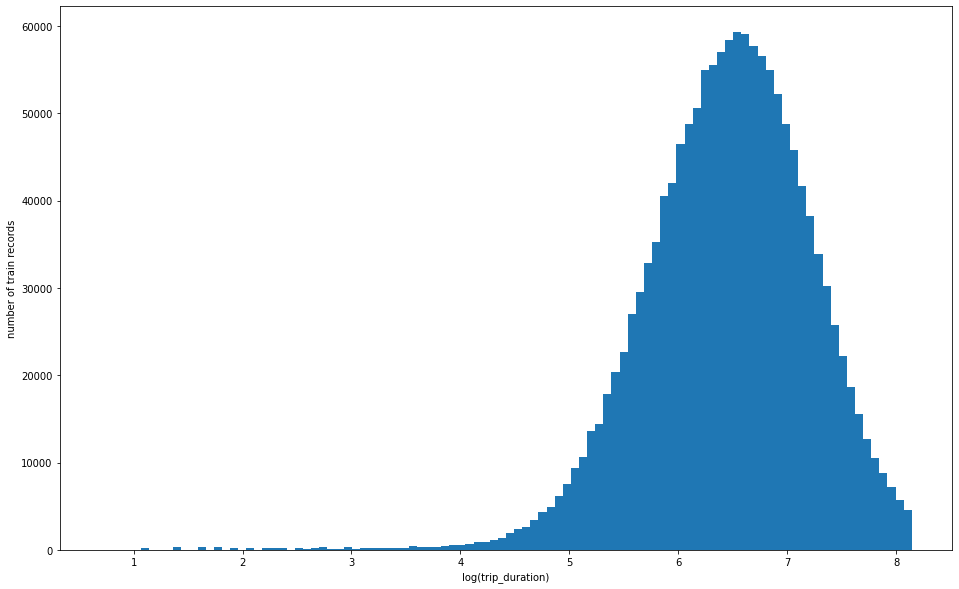

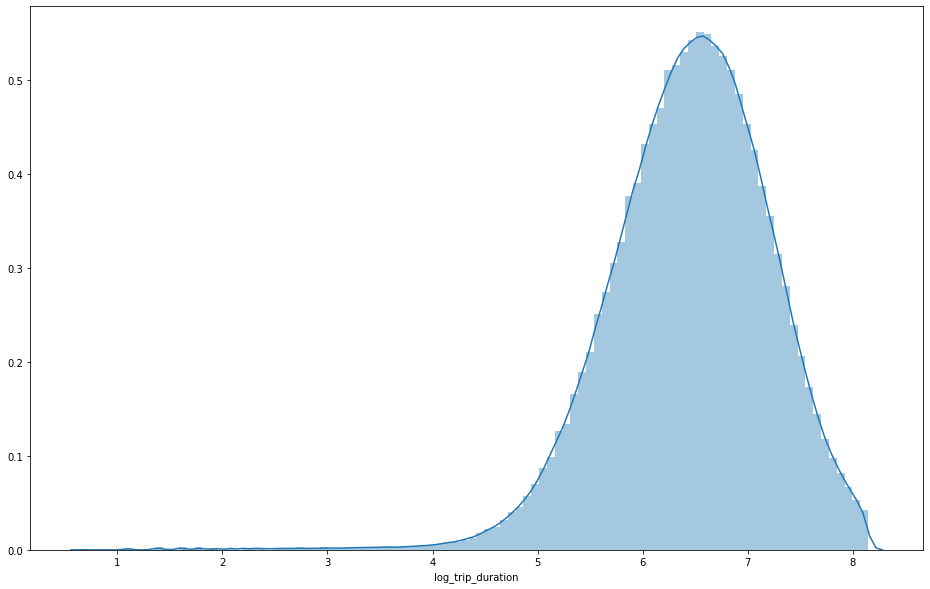

In [ ]:
train_df['log_trip_duration'] = np.log(train_df['trip_duration'].values + 1)
plt.hist(train_df['log_trip_duration'].values, bins=100)
plt.xlabel('log(trip_duration)')
plt.ylabel('number of train records')
plt.show()
sns.distplot(train_df["log_trip_duration"], bins =100)

###b. Other features

No handles with labels found to put in legend.


Text(0, 0.5, 'Time in Seconds')

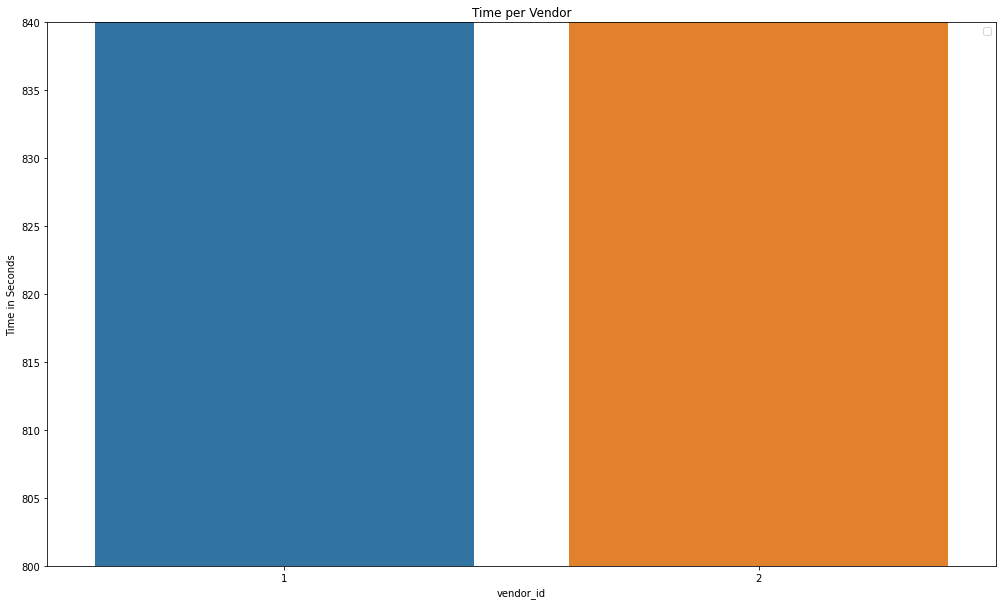

In [ ]:
# check two different vendors in their mean trip durations
import warnings
warnings.filterwarnings("ignore")
plot_vendor = train_df.groupby('vendor_id')['trip_duration'].mean()
plt.subplots(1,1,figsize=(17,10))
plt.ylim(ymin=800)
plt.ylim(ymax=840)
sns.barplot(plot_vendor.index,plot_vendor.values)
plt.title('Time per Vendor')
plt.legend(loc=0)
plt.ylabel('Time in Seconds')

No handles with labels found to put in legend.


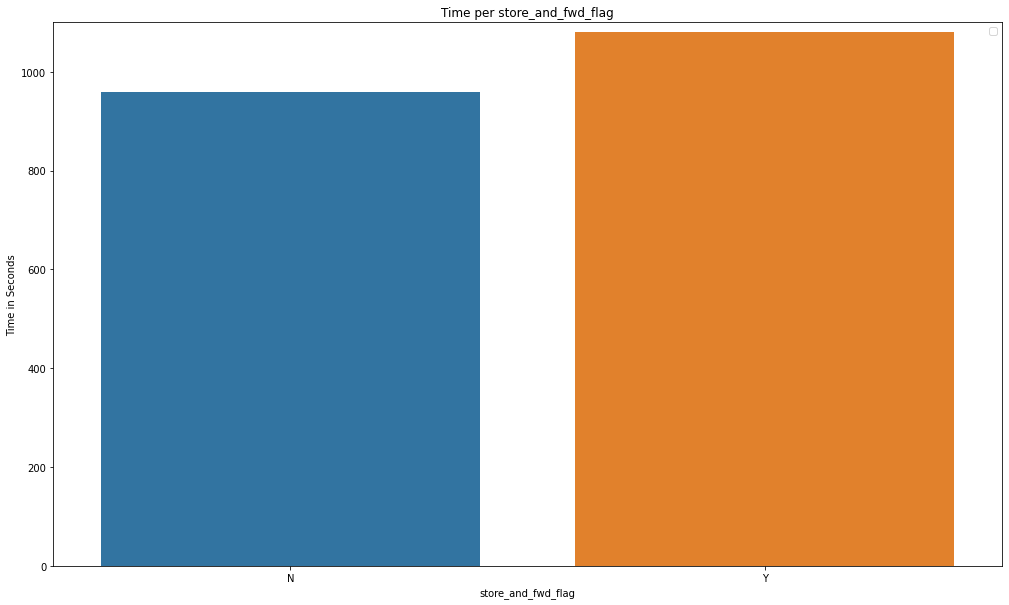

In [ ]:
# eheck if there is a significant difference in mean travel time
snwflag = train_df.groupby('store_and_fwd_flag')['trip_duration'].mean()
plt.subplots(1,1,figsize=(17,10))
plt.ylim(ymin=0)
plt.ylim(ymax=1100)
plt.title('Time per store_and_fwd_flag')
plt.legend(loc=0)
plt.ylabel('Time in Seconds')
sns.barplot(snwflag.index,snwflag.values)

In [ ]:
train_df.groupby('passenger_count').size()

passenger_count
0         60
1    1033540
2     210318
3      59896
4      28404
5      78088
6      48333
7          3
8          1
9          1
dtype: int64

No handles with labels found to put in legend.


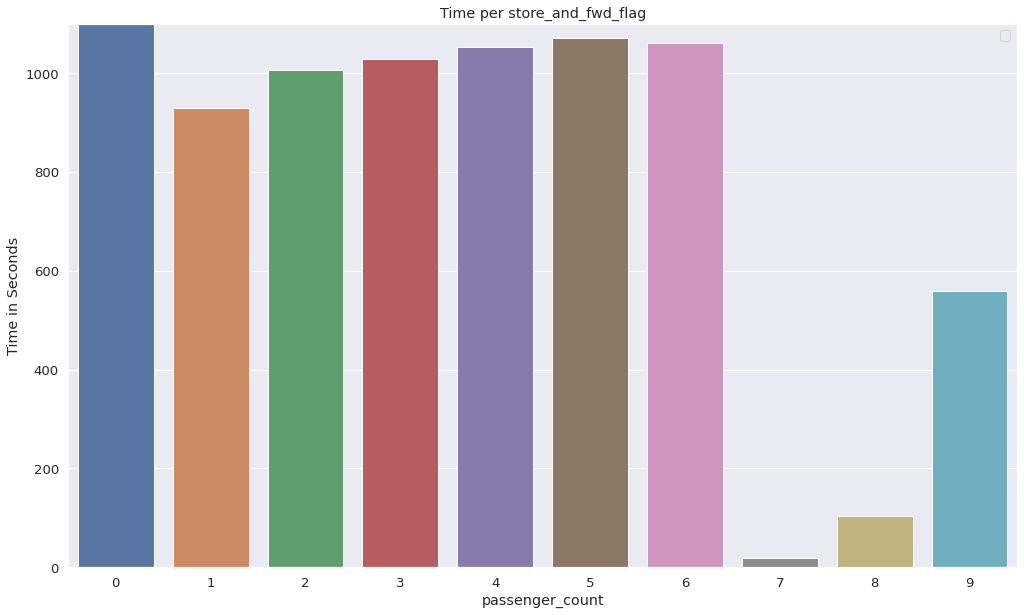

In [ ]:
pc = train_df.groupby('passenger_count')['trip_duration'].mean()

plt.subplots(1,1,figsize=(17,10))
plt.ylim(ymin=0)
plt.ylim(ymax=1100)
plt.title('Time per store_and_fwd_flag')
plt.legend(loc=0)
plt.ylabel('Time in Seconds')
sns.barplot(pc.index,pc.values)

### c. Time features

In [ ]:
# For time extraction
train_df['pickup_datetime'] = pd.to_datetime(train_df.pickup_datetime)
test_df['pickup_datetime'] = pd.to_datetime(test_df.pickup_datetime)
train_df['dropoff_datetime'] = pd.to_datetime(train_df.dropoff_datetime)
test_df['pickup_datetime'] = pd.to_datetime(test_df.pickup_datetime)

add specific time features

In [ ]:
# check days

from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
import time
from datetime import timedelta


for df in (train_df,test_df):

    # Load a list of holidays in the US
    calendar = USFederalHolidayCalendar()
    holidays = calendar.holidays()

    # Load business days
    us_bd = CustomBusinessDay(calendar = USFederalHolidayCalendar())
    business_days = pd.date_range(start = df.pickup_datetime.min(), 
                                     end = df.pickup_datetime.max(), 
                                     freq = us_bd)
    business_days = pd.to_datetime(business_days).date
    
    # Dates
    df['pickup_date'] = df['pickup_datetime'].dt.date

    # day of month 1 to 30/31
    df['pickup_day'] = df['pickup_datetime'].dt.day

    # month of year 1 to 12
    df['pickup_month'] = df['pickup_datetime'].dt.month

    # Weekday 0 to 6
    df['pickup_weekday'] = df['pickup_datetime'].dt.weekday
    
    # weekend
    df['pickup_is_weekend'] = df.pickup_weekday.map(lambda x: 1 if x >= 5 else 0)
    
    # holiday
    df['pickup_holiday'] = pd.to_datetime(df.pickup_datetime.dt.date).isin(holidays)
    df['pickup_holiday'] = df.pickup_holiday.map(lambda x: 1 if x == True else 0)
    
    # If day is before or after a holiday
    df['pickup_near_holiday'] = (pd.to_datetime(df.pickup_datetime.dt.date).isin(holidays + timedelta(days=1)) |
                                 pd.to_datetime(df.pickup_datetime.dt.date).isin(holidays - timedelta(days=1)))
    df['pickup_near_holiday'] = df.pickup_near_holiday.map(lambda x: 1 if x == True else 0)
    df['pickup_businessday'] = pd.to_datetime(df.pickup_datetime.dt.date).isin(business_days)
    df['pickup_businessday'] = df.pickup_businessday.map(lambda x: 1 if x == True else 0)

    # day of week
    df['pickup_dayofweek'] = df['pickup_datetime'].dt.dayofweek
    
    df['pickup_time_delta'] = (df['pickup_datetime'] - df['pickup_datetime'].min()).dt.total_seconds()
    
    df['week_delta'] = df['pickup_datetime'].dt.weekday + \
                        ((df['pickup_datetime'].dt.hour + \
                        (df['pickup_datetime'].dt.minute / 60.0)) / 24.0)

    #week of year
    df['pickup_weekofyear'] = df['pickup_datetime'].dt.weekofyear

    #hour of day 0 to 23
    df['pickup_hour'] = df['pickup_datetime'].dt.hour

    #hour: 19~24
    df['pickup_is_night'] = [1 if (i==0 or i>=19)  else 0 for i in df['pickup_datetime'].dt.hour]
    
    #hour: 24~4
    df['pickup_is_latenight'] = [1 if (i<5 or i>=0)  else 0 for i in df['pickup_datetime'].dt.hour]


    #minute of hour
    df['pickup_minute'] = df['pickup_datetime'].dt.minute
    
    # day of year
    df['pickup_dayofyear'] = df['pickup_datetime'].dt.dayofyear
    
    # make weekday and hour cyclic, since we want to let machine understand 
    df.pickup_hour = df.pickup_hour.astype('int')
    df['week_delta_sin'] = np.sin((df['week_delta'] / 7) * np.pi)**2
    df['pickup_hour_sin'] = np.sin((df['pickup_hour'] / 24) * np.pi)**2

    # Calculate what minute in a day the pickup is at
    df['pickup_minuteoftheday'] = df.pickup_datetime.dt.hour*60 + df.pickup_datetime.dt.minute
    df['pickup_dt'] = (df['pickup_datetime'] - df['pickup_datetime'].min()).dt.total_seconds()
    df['pickup_week_hour'] = df['pickup_weekday'] * 24 + df['pickup_hour']

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 34 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   id                     1458644 non-null  object        
 1   vendor_id              1458644 non-null  int64         
 2   pickup_datetime        1458644 non-null  datetime64[ns]
 3   dropoff_datetime       1458644 non-null  datetime64[ns]
 4   passenger_count        1458644 non-null  int64         
 5   pickup_longitude       1458644 non-null  float64       
 6   pickup_latitude        1458644 non-null  float64       
 7   dropoff_longitude      1458644 non-null  float64       
 8   dropoff_latitude       1458644 non-null  float64       
 9   store_and_fwd_flag     1458644 non-null  object        
 10  trip_duration          1458644 non-null  int64         
 11  log_trip_duration      1458644 non-null  float64       
 12  pickup_date            14586

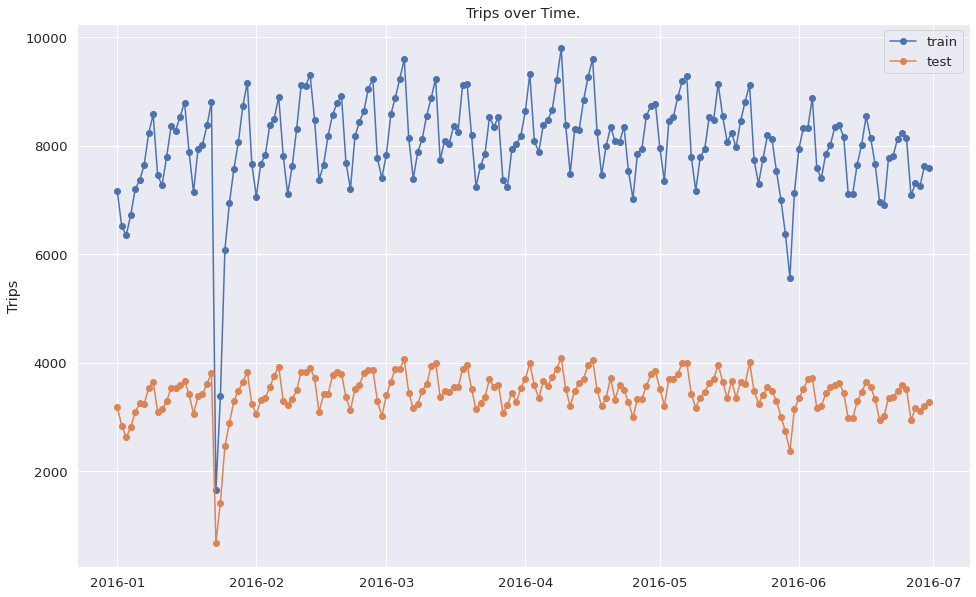

In [ ]:
# Plont a timesieres lin graph to see if train and test data sets looks simmilar shape of pattern.
plt.plot(train_df.groupby('pickup_date').count()[['id']], 'o-', label='train')
plt.plot(test_df.groupby('pickup_date').count()[['id']], 'o-', label='test')
plt.title('Trips over Time.')
plt.legend(loc=0)
plt.ylabel('Trips')
plt.show()

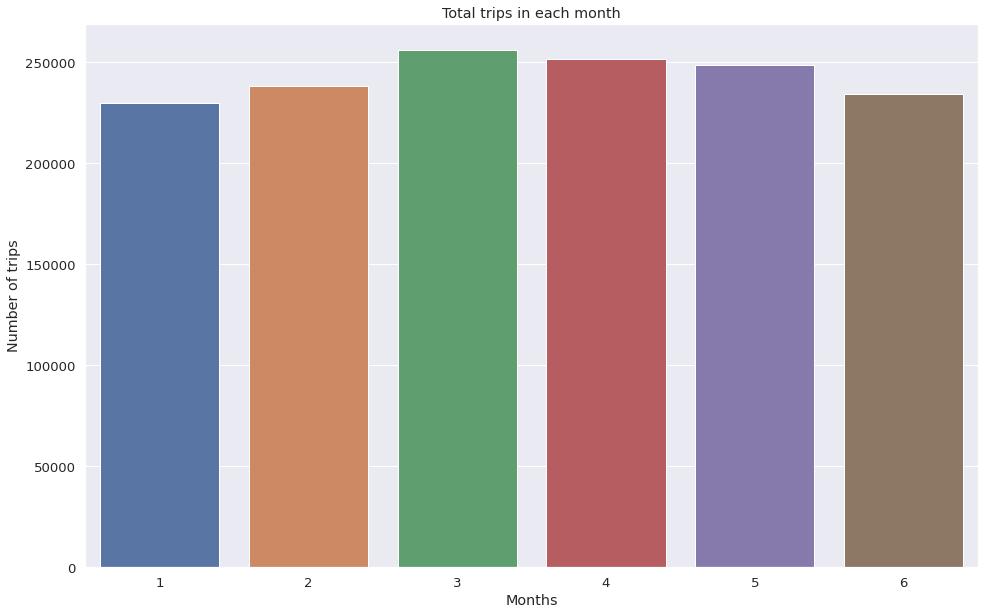

In [ ]:
sns.countplot(x='pickup_month', data=train_df)
#train_df.pickup_month.value_counts().plot(kind='bar',color=["black","gold"],align='center',width=0.3)
plt.xticks(rotation='horizontal')
plt.xlabel("Months")
plt.ylabel("Number of trips")
plt.title("Total trips in each month")
plt.show()

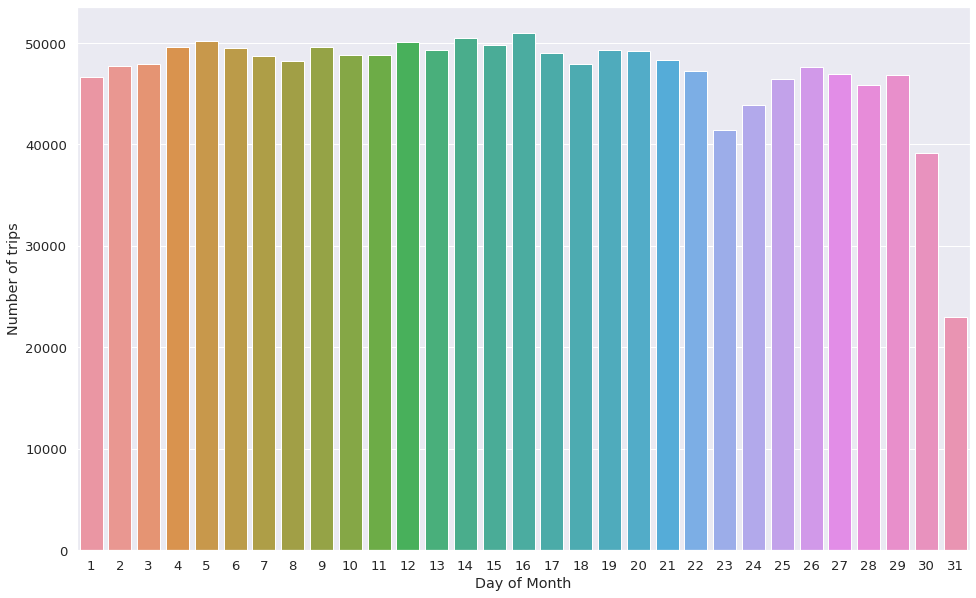

In [ ]:
sns.countplot(x='pickup_day', data=train_df)
plt.xticks(rotation='horizontal')
plt.xlabel("Day of Month")
plt.ylabel("Number of trips")
plt.show()

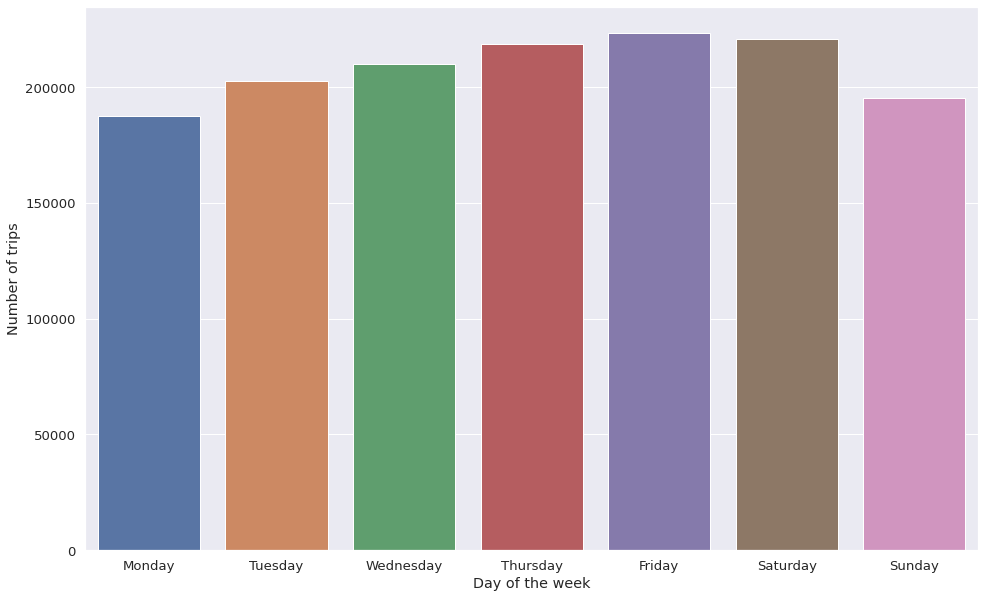

In [ ]:
days = [i for i in range(7)]
sns.countplot(x='pickup_weekday', data=train_df)
plt.xlabel('Day of the week')
plt.ylabel('Number of trips')
plt.xticks(days, ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'))
plt.show()

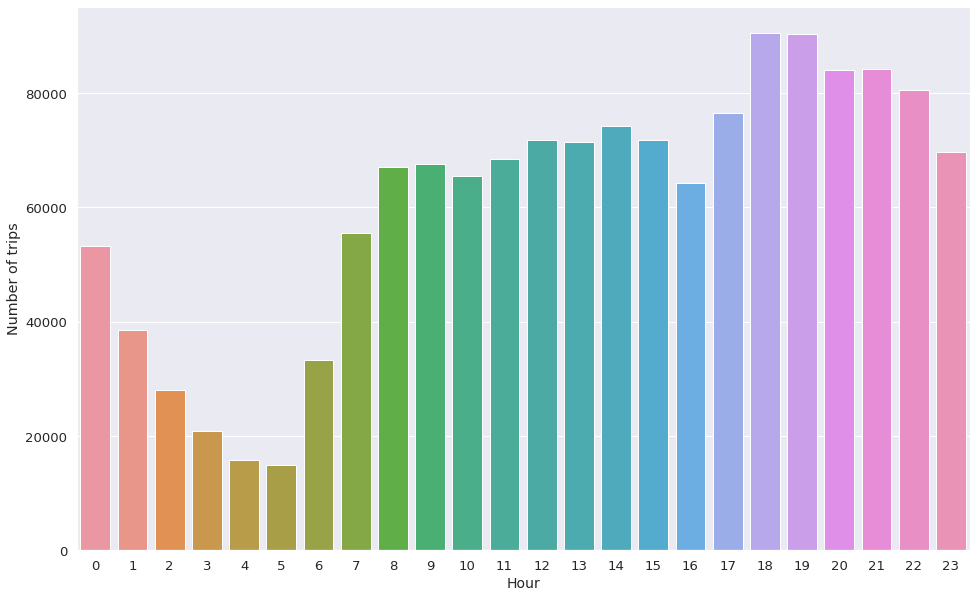

In [ ]:
sns.countplot(x='pickup_hour', data=train_df)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Number of trips')
plt.show()

Text(0.5, 1.0, 'Weekday Pickup hour')

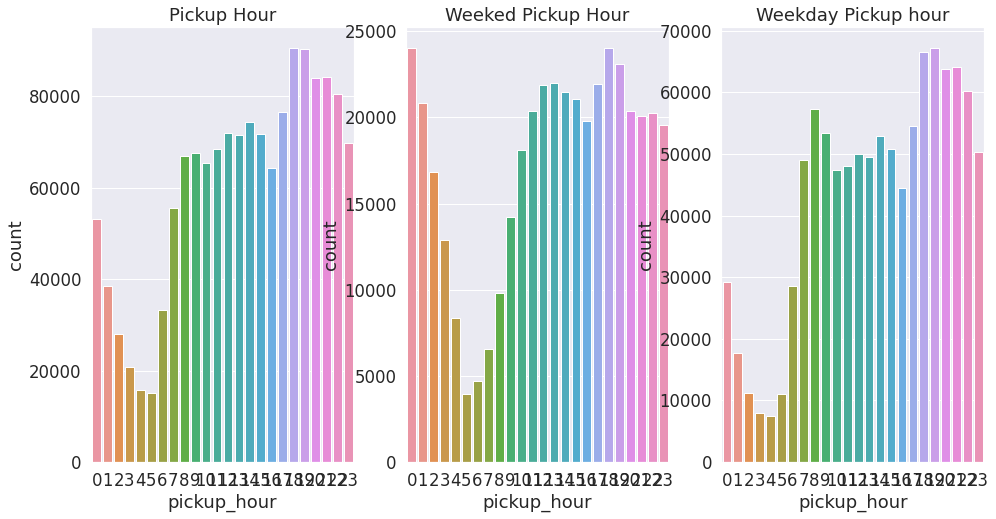

In [ ]:
fig, ax = plt.subplots(1,3,figsize = (16,8))

sns.countplot(x='pickup_hour', data=train_df, ax=ax[0])
sns.countplot(x='pickup_hour', data=train_df[train_df['pickup_is_weekend'] == 1], ax = ax[1])
sns.countplot(x='pickup_hour', data=train_df[train_df['pickup_is_weekend'] == 0], ax = ax[2])

ax[0].set_title('Pickup Hour')
ax[1].set_title('Weeked Pickup Hour')
ax[2].set_title('Weekday Pickup hour')

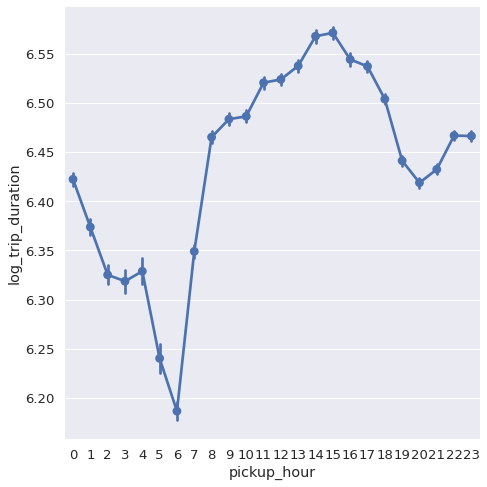

In [ ]:
sns.factorplot(x="pickup_hour", y="log_trip_duration", data=train_df,size=7)

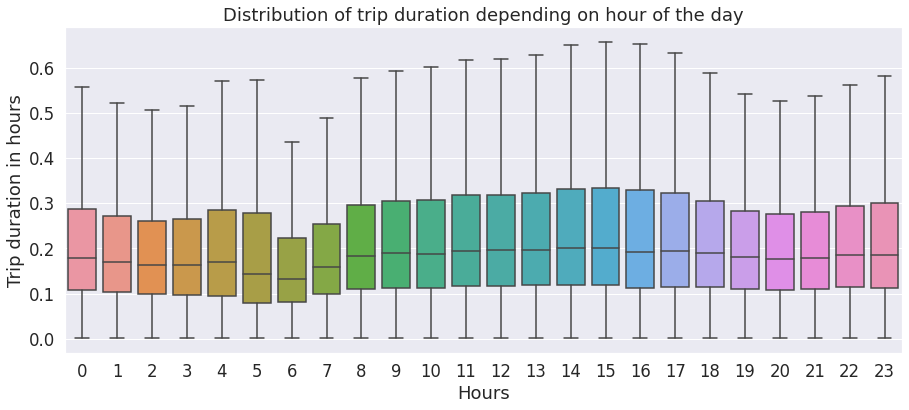

In [ ]:
hours = np.array([t.hour for t in train_df['pickup_datetime']])
sns.set(font_scale = 1.5)
plt.figure(figsize=(15,6))
sns.boxplot(hours,train_df['trip_duration'].values/3600,showfliers = False)
plt.title('Distribution of trip duration depending on hour of the day')
plt.ylabel('Trip duration in hours')
plt.xlabel('Hours')
plt.savefig('distribution of trip duration.eps')

In [ ]:
average_df = df.groupby(['is_weekend', 'hour']).mean().unstack(level=0).rename(columns={0:"weekday", 1:"weekend"})

KeyError: ignored

### d. Distance features

#### 1) Viaulazation of NYC taxi trips on the map

Text(0.5, 1.0, 'Dropoff')

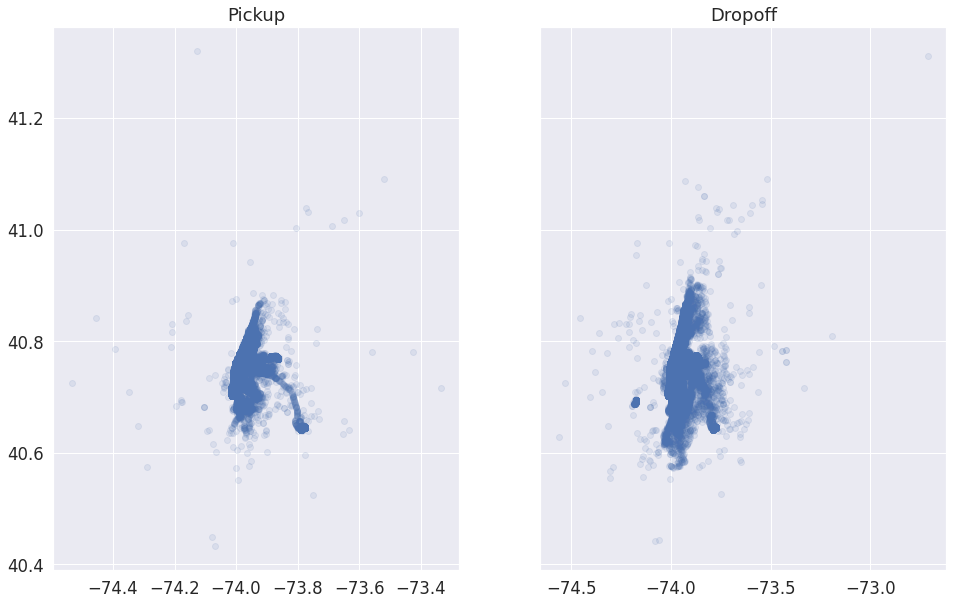

In [ ]:
# Look for outliers in plots
n = 100000 # number of data points to display

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.scatter(train_df.pickup_longitude[:n], 
            train_df.pickup_latitude[:n],
            alpha = 0.1)
ax1.set_title('Pickup')
ax2.scatter(train_df.dropoff_longitude[:n], 
            train_df.dropoff_latitude[:n],
            alpha = 0.1)
ax2.set_title('Dropoff')

Find boundaries of NYC

In [ ]:
print(train_df.pickup_latitude.max())
print(train_df.pickup_latitude.min())
print(train_df.pickup_longitude.max())
print(train_df.pickup_longitude.min())
print()
print(train_df.dropoff_latitude.max())
print(train_df.dropoff_latitude.min())
print(train_df.dropoff_longitude.max())
print(train_df.dropoff_longitude.min())

51.88108444213867
34.359695434570305
-61.33552932739258
-121.93334197998048

43.92102813720703
32.1811408996582
-61.33552932739258
-121.9333038330078


In [ ]:
# Find limits of location
max_value = 99.999
min_value = 0.001

max_pickup_lat = np.percentile(train_df.pickup_latitude, max_value)
min_pickup_lat = np.percentile(train_df.pickup_latitude, min_value)
max_pickup_long = np.percentile(train_df.pickup_longitude, max_value)
min_pickup_long = np.percentile(train_df.pickup_longitude, min_value)

max_dropoff_lat = np.percentile(train_df.dropoff_latitude, max_value)
min_dropoff_lat = np.percentile(train_df.dropoff_latitude, min_value)
max_dropoff_long = np.percentile(train_df.dropoff_longitude, max_value)
min_dropoff_long = np.percentile(train_df.dropoff_longitude, min_value)

In [ ]:
# Remove extreme values
train_df = train_df[(train_df.pickup_latitude <= max_pickup_lat) & (train_df.pickup_latitude >= min_pickup_lat)]
train_df = train_df[(train_df.pickup_longitude <= max_pickup_long) & (train_df.pickup_longitude >= min_pickup_long)]

train_df = train_df[(train_df.dropoff_latitude <= max_dropoff_lat) & (train_df.dropoff_latitude >= min_dropoff_lat)]
train_df = train_df[(train_df.dropoff_longitude <= max_dropoff_long) & (train_df.dropoff_longitude >= min_dropoff_long)]

Text(0.5, 1.0, 'Dropoff')

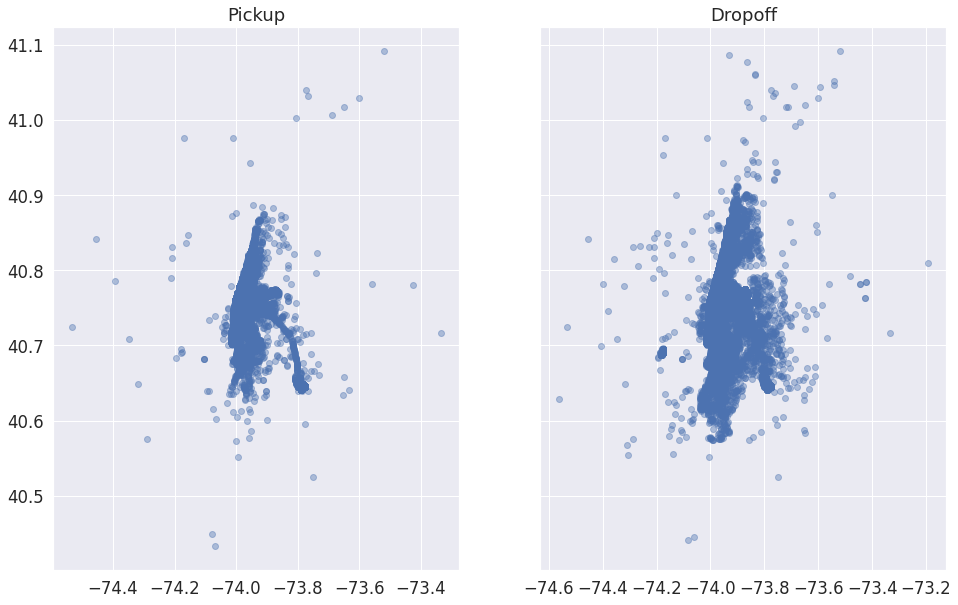

In [ ]:
# Replot to see the differences
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.scatter(train_df.pickup_longitude[:n], 
            train_df.pickup_latitude[:n],
            alpha = 0.4)
ax1.set_title('Pickup')
ax2.scatter(train_df.dropoff_longitude[:n], 
            train_df.dropoff_latitude[:n],
            alpha = 0.4)
ax2.set_title('Dropoff')

In [ ]:
# NYC borders
# city_long_border = [-74.03, -73.75]
# city_lat_border = [40.63, 40.85]
# set up limits or rides within NYC
train_df = train_df [train_df ['pickup_longitude'] <= -73.75]
train_df = train_df [train_df ['pickup_longitude'] >= -74.03]
train_df = train_df [train_df ['pickup_latitude'] <= 40.85]
train_df = train_df [train_df ['pickup_latitude'] >= 40.63]
train_df = train_df [train_df ['dropoff_longitude'] <= -73.75]
train_df = train_df [train_df ['dropoff_longitude']  >= -74.03]
train_df = train_df [train_df ['dropoff_latitude'] <= 40.85]
train_df = train_df [train_df ['dropoff_latitude']  >= 40.63]

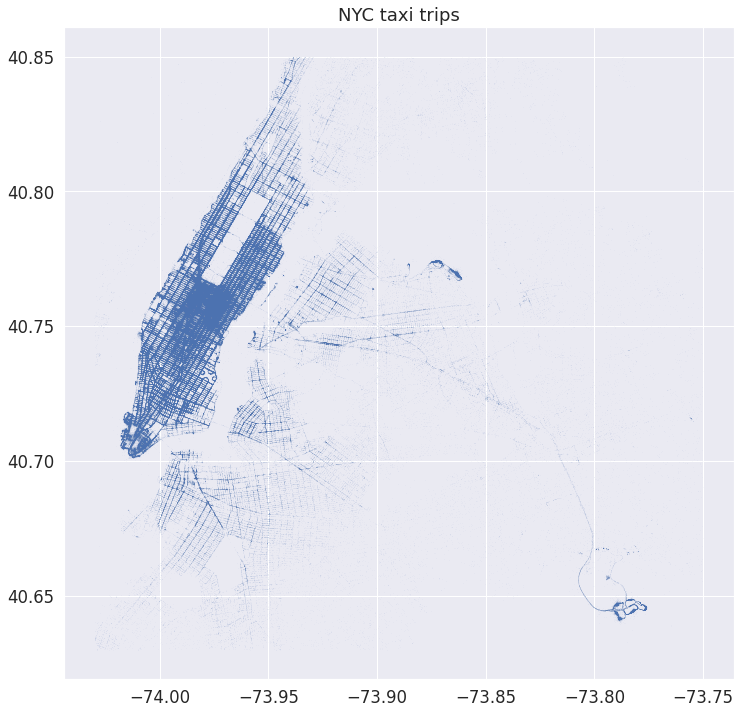

In [ ]:
# check the graph of NYC borders

longitude = list(train_df.pickup_longitude) + list (train_df.dropoff_longitude)
latitude = list(train_df.pickup_latitude) + list (train_df.dropoff_latitude)
plt.figure (figsize = (12,12))
plt.plot(longitude, latitude, '.', alpha = 0.4, markersize = 0.05)
plt.title('NYC taxi trips')
plt.show()

In [ ]:
from sklearn.cluster import MiniBatchKMeans

In [ ]:
# get lon & lat clustering for following avg location speed calculation
def get_clustering(df):
    coords = np.vstack((train_df[['pickup_latitude', 'pickup_longitude']].values,
                    train_df[['dropoff_latitude', 'dropoff_longitude']].values,
                    test_df[['pickup_latitude', 'pickup_longitude']].values,
                    test_df[['dropoff_latitude', 'dropoff_longitude']].values))
    df_ = df.copy()
    sample_ind = np.random.permutation(len(coords))[:500000]
    kmeans = MiniBatchKMeans(n_clusters=100, batch_size=10000).fit(coords[sample_ind])
    df_.loc[:, 'pickup_cluster'] = kmeans.predict(df_[['pickup_latitude', 'pickup_longitude']])
    df_.loc[:, 'dropoff_cluster'] = kmeans.predict(df_[['dropoff_latitude', 'dropoff_longitude']])
    return df_


def trip_cluser_count(df):
    df_ = df.copy()
    df_.pickup_datetime = pd.to_datetime(df_.pickup_datetime)
    group_freq = '60min'
    df_dropoff_counts = df_ \
        .set_index('pickup_datetime') \
        .groupby([pd.Grouper(freq='M'), 'dropoff_cluster']) \
        .agg({'id': 'count'}) \
        .reset_index().set_index('pickup_datetime') \
        .groupby('dropoff_cluster').rolling('240min').mean() \
        .drop('dropoff_cluster', axis=1) \
        .reset_index().set_index('pickup_datetime').shift(freq='-120min').reset_index() \
        .rename(columns={'pickup_datetime': 'pickup_datetime_group', 'id': 'dropoff_cluster_count'})
        
    df_['pickup_datetime_group'] = df_['pickup_datetime'].dt.round(group_freq)
    df_['dropoff_cluster_count'] = \
            df_[['pickup_datetime_group', 'dropoff_cluster']]\
            .merge(df_dropoff_counts,on=['pickup_datetime_group', 'dropoff_cluster'], how='left')\
            ['dropoff_cluster_count'].fillna(0)
            
    return df_

In [ ]:
# get lon & lat clustering 
train_df= get_clustering(train_df)
test_df= get_clustering(test_df)
# get avg ride count on dropoff cluster 
train_df = trip_cluser_count(train_df)
test_df = trip_cluser_count(test_df)

In [ ]:
# neighbors
coords = np.vstack((train_df[['pickup_latitude', 'pickup_longitude']].values,
                    train_df[['dropoff_latitude', 'dropoff_longitude']].values))

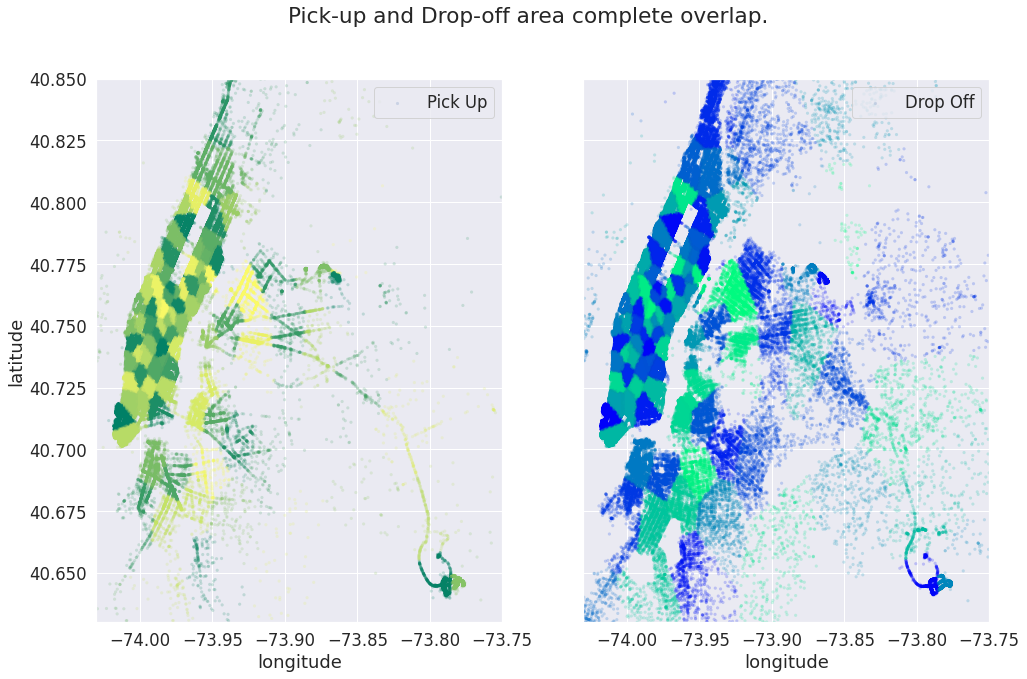

In [ ]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True)
ax[0].scatter(train_df.pickup_longitude.values[:500000],
           train_df.pickup_latitude.values[:500000], s=10, lw=0,
           c=train_df.pickup_cluster[:500000].values, cmap='summer', alpha=0.2, label='Pick Up')
ax[1].scatter(train_df.dropoff_longitude.values[:500000],
           train_df.dropoff_latitude.values[:500000], s=10, lw=0,
           c=train_df.dropoff_cluster[:500000].values, cmap='winter', alpha=0.2, label='Drop Off')
fig.suptitle('Pick-up and Drop-off area complete overlap.')
ax[0].set_xlim(city_long_border)
ax[0].set_ylim(city_lat_border)
ax[0].legend(loc=0)
ax[0].set_ylabel('latitude')
ax[0].set_xlabel('longitude')
ax[1].set_xlim(city_long_border)
ax[1].set_ylim(city_lat_border)
ax[1].set_xlabel('longitude')
ax[1].legend(loc=0)
plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()


#### 2) Distance features

The haversine formula determines the great-circle distance between two points on a sphere given their longitudes and latitudes. Important in navigation, it is a special case of a more general formula in spherical trigonometry, the law of haversines, that relates the sides and angles of spherical triangles.

$$ 2rarcsin\sqrt{\sin^2(\frac{φ_2 -φ_1}{2}) + cos(φ_1)cos(φ_2)sin^2(\frac{λ_2 -λ_1}{2})} $$

In [ ]:
#from haversine import haversine

#train_df['haversine_distance'] = train_df.apply(lambda row: haversine( (row['pickup_latitude'], row['pickup_longitude']), (row['dropoff_latitude'], row['dropoff_longitude']) ), axis=1)
#test_df['haversine_distance'] = test_df.apply(lambda row: haversine( (row['pickup_latitude'], row['pickup_longitude']), (row['dropoff_latitude'], row['dropoff_longitude']) ), axis=1)

# Haversine distance
def get_haversine_distance(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  #  km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h 

# Manhattan distance
# Taxi cant fly ! have to move in blocks/roads
def get_manhattan_distance(lat1, lng1, lat2, lng2):
    # km 
    a = get_haversine_distance(lat1, lng1, lat1, lng2)
    b = get_haversine_distance(lat1, lng1, lat2, lng1)
    return a + b

  
# get direction (arc tangent angle)
def get_direction(lat1, lng1, lat2, lng2):
    # theta
    AVG_EARTH_RADIUS = 6371  
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))

def gat_trip_center(df):
    df_ = df.copy()
    df_.loc[:, 'center_latitude'] = (df_['pickup_latitude'].values + df_['dropoff_latitude'].values) / 2
    df_.loc[:, 'center_longitude'] = (df_['pickup_longitude'].values + df_['dropoff_longitude'].values) / 2
    return df_



### ======================== ###

def get_features(df):
    # km 
    df_ = df.copy()
    ###  USING .loc making return array ordering 
    # distance
    df_.loc[:, 'distance_haversine'] = get_haversine_distance(
                                      df_['pickup_latitude'].values,
                                      df_['pickup_longitude'].values,
                                      df_['dropoff_latitude'].values,
                                      df_['dropoff_longitude'].values)
    df_.loc[:, 'distance_manhattan'] = get_manhattan_distance(
                                      df_['pickup_latitude'].values,
                                      df_['pickup_longitude'].values,
                                      df_['dropoff_latitude'].values,
                                      df_['dropoff_longitude'].values)
    # direction 
    df_.loc[:, 'direction'] = get_direction(df_['pickup_latitude'].values,
                                          df_['pickup_longitude'].values, 
                                          df_['dropoff_latitude'].values, 
                                          df_['dropoff_longitude'].values)
    return df_

In [ ]:
# get other features 
train_df = get_features(train_df)
test_df = get_features(test_df)
# get center of trip route 
train_df = gat_trip_center(train_df)
test_df = gat_trip_center(test_df)

### e. Speed features

In [ ]:
train_df.loc[:, 'avg_speed_h'] = 3600 * train_df['distance_haversine'] / train_df['trip_duration']
train_df.loc[:, 'avg_speed_m'] = 3600 * train_df['distance_manhattan'] / train_df['trip_duration']

In [ ]:
# avg speed on cluster 
def avg_cluser_speed(df):
    df_ = df.copy()
    # avg speed on cluster 
    avg_cluser_h = df_.groupby(['pickup_cluster','dropoff_cluster']).mean()['avg_speed_h'].reset_index()
    avg_cluser_h.columns = ['pickup_cluster','dropoff_cluster','avg_speed_cluster_h']
    avg_cluser_m = df_.groupby(['pickup_cluster','dropoff_cluster']).mean()['avg_speed_m'].reset_index()
    avg_cluser_m.columns = ['pickup_cluster','dropoff_cluster','avg_speed_cluster_m']
    # merge dataframe
    df_ = pd.merge(df_,avg_cluser_h, how = 'left', on = ['pickup_cluster','dropoff_cluster'])
    df_ = pd.merge(df_,avg_cluser_m, how = 'left', on = ['pickup_cluster','dropoff_cluster'])
    return df_


# avg duration on cluster 
def avg_cluser_duration(df):
    df_ = df.copy()
    # avg speed on cluster 
    avg_cluser_duration = df_.groupby(['pickup_cluster','dropoff_cluster']).mean()['trip_duration'].reset_index()
    avg_cluser_duration.columns = ['pickup_cluster','dropoff_cluster','avg_cluster_duration']
    # merge dataframe
    df_ = pd.merge(df_,avg_cluser_duration, how = 'left', on = ['pickup_cluster','dropoff_cluster'])
    return df_


def avg_cluster_speed_(df):
    df_ = df.copy()
    # only get pickup_cluster first as test here 
    for gby_col in ['pickup_cluster']:
        gby = df_.groupby(gby_col).mean()[['avg_speed_h', 'avg_speed_m', 'trip_duration']]
        gby.columns = ['%s_gby_%s' % (col, gby_col) for col in gby.columns]
        df_ = pd.merge(df_, gby, how='left', left_on=gby_col, right_index=True)
        #df_test = pd.merge(df_test, gby, how='left', left_on=gby_col, right_index=True)
    for gby_cols in [
                 ['pickup_cluster', 'dropoff_cluster']]:
        coord_speed = df_.groupby(gby_cols).mean()[['avg_speed_h']].reset_index()
        coord_count = df_.groupby(gby_cols).count()[['id']].reset_index()
        coord_stats = pd.merge(coord_speed, coord_count, on=gby_cols)
        #coord_stats = coord_stats[coord_stats['id'] > 100]
        coord_stats.columns = gby_cols + ['avg_speed_h_%s' % '_'.join(gby_cols), 'cnt_%s' %  '_'.join(gby_cols)]
        df_ = pd.merge(df_, coord_stats, how='left', on=gby_cols)
    return df_


In [ ]:
# get avg cluster speed 
train_df  = avg_cluser_speed(train_df)
train_df  = avg_cluser_duration(train_df)
train_df = avg_cluster_speed_(train_df)

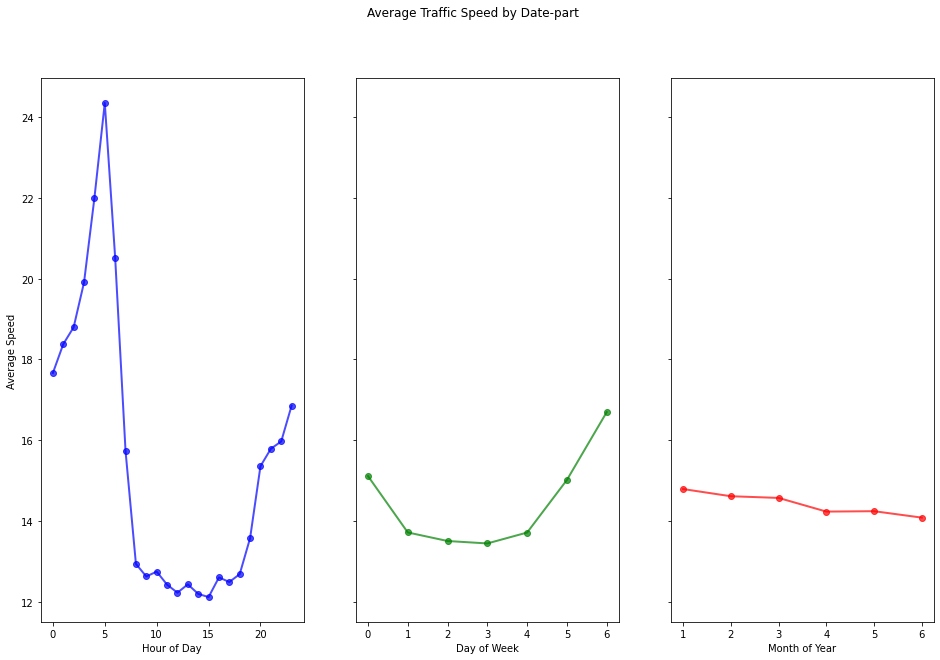

In [ ]:
fig, ax = plt.subplots(ncols=3, sharey=True)
ax[0].plot(train_df.groupby('pickup_hour').mean()['avg_speed_h'], 'bo-', lw=2, alpha=0.7)
ax[1].plot(train_df.groupby('pickup_dayofweek').mean()['avg_speed_h'], 'go-', lw=2, alpha=0.7)
ax[2].plot(train_df.groupby('pickup_month').mean()['avg_speed_h'], 'ro-', lw=2, alpha=0.7)
ax[0].set_xlabel('Hour of Day')
ax[1].set_xlabel('Day of Week')
ax[2].set_xlabel('Month of Year')
ax[0].set_ylabel('Average Speed')
fig.suptitle('Average Traffic Speed by Date-part')
plt.show()

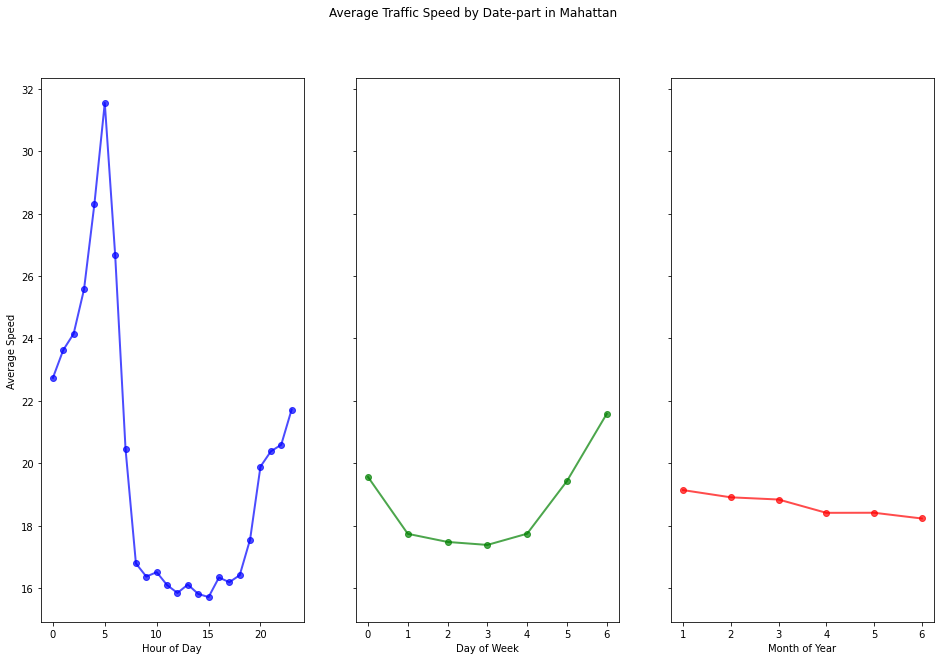

In [ ]:
fig, ax = plt.subplots(ncols=3, sharey=True)
ax[0].plot(train_df.groupby('pickup_hour').mean()['avg_speed_m'], 'bo-', lw=2, alpha=0.7)
ax[1].plot(train_df.groupby('pickup_dayofweek').mean()['avg_speed_m'], 'go-', lw=2, alpha=0.7)
ax[2].plot(train_df.groupby('pickup_month').mean()['avg_speed_m'], 'ro-', lw=2, alpha=0.7)
ax[0].set_xlabel('Hour of Day')
ax[1].set_xlabel('Day of Week')
ax[2].set_xlabel('Month of Year')
ax[0].set_ylabel('Average Speed')
fig.suptitle('Average Traffic Speed by Date-part in Mahattan')
plt.show()

In [ ]:
train_df['log_haversine_distance'] = np.log1p(train_df['distance_haversine']) 
test_df['log_haversine_distance'] = np.log1p(test_df['distance_haversine'])

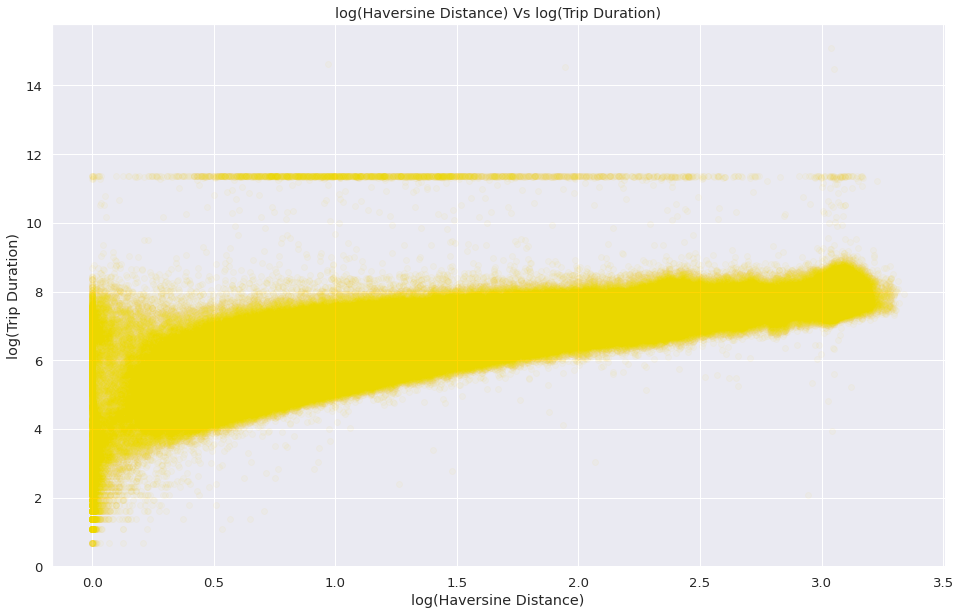

In [ ]:
plt.scatter(train_df.log_haversine_distance,train_df.log_trip_duration,color="gold",alpha=0.04)
plt.ylabel("log(Trip Duration)")
plt.xlabel("log(Haversine Distance)")
plt.title("log(Haversine Distance) Vs log(Trip Duration)")